# Network Analysis Tool

This is a project to demonstrate the type of work that was done during my summer internship at Jio in 2018. Since the nature of work done at the company itself was confidential, I decided to work on a similar project with an open dataset. The data set being used is **UNSW-NB15** which can be downloaded from: https://www.unsw.adfa.edu.au/unsw-canberra-cyber/cybersecurity/ADFA-NB15-Datasets/.

## Importing the required libraries

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import argmax
import numpy as np
import operator
import pandas
from sklearn import tree
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Getting the datasets

In [2]:
file_location = 'datasets/training_set.csv'
training_data = pandas.read_csv(file_location)

file_location = 'datasets/testing_set.csv'
testing_data = pandas.read_csv(file_location)

## Visualising the provided data to gain better insights

In [3]:
training_data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,9.090909e+04,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,1.250000e+05,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,2.000000e+05,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,1.666667e+05,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,1.000000e+05,...,1,3,0,0,0,2,3,0,Normal,0
5,6,0.000003,udp,-,INT,2,0,784,0,3.333333e+05,...,1,2,0,0,0,2,2,0,Normal,0
6,7,0.000006,udp,-,INT,2,0,1960,0,1.666667e+05,...,1,2,0,0,0,2,2,0,Normal,0
7,8,0.000028,udp,-,INT,2,0,1384,0,3.571429e+04,...,1,3,0,0,0,1,3,0,Normal,0
8,9,0.000000,arp,-,INT,1,0,46,0,0.000000e+00,...,2,2,0,0,0,2,2,1,Normal,0
9,10,0.000000,arp,-,INT,1,0,46,0,0.000000e+00,...,2,2,0,0,0,2,2,1,Normal,0


In [4]:
training_data_dictionary = {}
training_data_size = int(training_data.size / training_data.iloc[0].size)

for row_number in range(training_data_size):
    try:
        training_data_dictionary[training_data.loc[row_number]['attack_cat']] = training_data_dictionary[training_data.loc[row_number]['attack_cat']] + 1
    except:
        training_data_dictionary[training_data.loc[row_number]['attack_cat']] = 1

### Types of different categories in the dataset

In [5]:
training_data_dictionary

{'Normal': 37000,
 'Reconnaissance': 3496,
 'Backdoor': 583,
 'DoS': 4089,
 'Exploits': 11132,
 'Analysis': 677,
 'Fuzzers': 6062,
 'Worms': 44,
 'Shellcode': 378,
 'Generic': 18871}

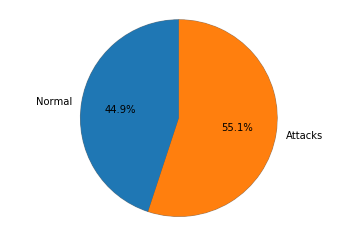

In [6]:
pie_labels = ['Normal', 'Attacks']
pie_sizes = []
pie_sizes.append(training_data_dictionary['Normal'])
pie_sizes.append(training_data_size - training_data_dictionary['Normal'])
pie_explode = [0.1, 0.1]

fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode = pie_explode, labels=pie_labels, autopct='%1.1f%%', pctdistance = 0.6, shadow=True, startangle=90, radius = 300)
ax1.axis('equal')

plt.show()

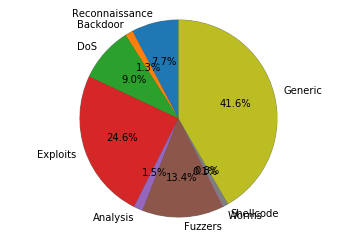

In [7]:
pie_labels = []
pie_sizes = []
pie_explode = []

for value in training_data_dictionary:
    if value == 'Normal':
        continue
    else:
        pie_labels.append(value)
        pie_sizes.append(training_data_dictionary[value])
        pie_explode.append(0.1)

fig1, ax1 = plt.subplots()
ax1.pie(pie_sizes, explode = pie_explode, labels=pie_labels, autopct='%1.1f%%', pctdistance = 0.6, shadow=True, startangle=90, radius = 300)
ax1.axis('equal')

plt.show()

## Available features in the dataset

In [8]:
training_data.columns.values

array(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
       'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports',
       'attack_cat', 'label'], dtype=object)

## Converting the dataset to a features-label type

The features have been selected at random for this model gneeration.

In [9]:
feature_lists = ['dur', 'spkts', 'dpkts', 'sbytes', 'sload', 'dload']
training_data_features = training_data.loc[:, feature_lists]
training_data_labels = training_data.label

## Trying out a decision tree classifier

In [10]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(training_data_features, training_data_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Check the accuracy of the model 

In [11]:
testing_data_features = testing_data.loc[:, feature_lists]
testing_data_labels = testing_data.label

predicted_labels = dt_model.predict(testing_data_features)

In [12]:
print("The accuracy score is: " + str(accuracy_score(predicted_labels, testing_data_labels) * 100))

The accuracy score is: 89.25008982496962


In [13]:
def plot_confusion_matrix(cm, classes,
                          normalize=True,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix: ")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix: 
[[0.93178571 0.06821429]
 [0.12593325 0.87406675]]


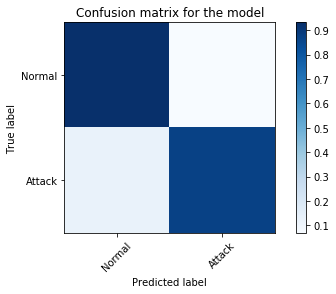

In [14]:
cnf_matrix = confusion_matrix(testing_data_labels, predicted_labels)
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Attack'], title='Confusion matrix for the model')

## Correlation analysis of the dataset

In [15]:
correlation_analysis = training_data.corr()['label']
print(correlation_analysis)

id                  -0.387489
dur                 -0.001145
spkts               -0.027731
dpkts               -0.061515
sbytes               0.020641
dbytes              -0.032632
rate                 0.328629
sttl                 0.504159
dttl                -0.098591
sload                0.124548
dload               -0.280534
sloss                0.006360
dloss               -0.044399
sinpkt              -0.120768
dinpkt              -0.037585
sjit                -0.027397
djit                -0.027131
swin                -0.414504
stcpb               -0.281428
dtcpb               -0.282860
dwin                -0.369257
tcprtt              -0.148800
synack              -0.149944
ackdat              -0.120522
smean               -0.061146
dmean               -0.211544
trans_depth         -0.025804
response_body_len   -0.016414
ct_srv_src           0.290195
ct_state_ttl         0.318517
ct_dst_ltm           0.257995
ct_src_dport_ltm     0.341513
ct_dst_sport_ltm     0.393668
ct_dst_src

A high positive/negative co-efficient is generally looked for in such types of problems since they allow to get better results from the predictive model.

## Selecting the top three correlated variables and investigating them

The top three correlated variables to the *attack label* are: **sttl** (Source to destination time to live value), **swin** (Source TCP window advertisement value) and **ct_dst_sport_ltm** (No. of connections of the same destination address in 100 connections according to the last time).

### Calculating tick intervals and lists for a given list

In [16]:
def calculate_ticks(values, interval_size):
    minimum_value = min(values)
    interval = int((max(values) - min(values))/interval_size)
    final_list = [minimum_value]
    calculated_value = minimum_value
    
    while(1):
        calculated_value = calculated_value + interval
        if(calculated_value > max(values)):
            break
        final_list.append(calculated_value)
    
    return final_list

In [17]:
sample_size = 1000
random_numbers = np.arange(training_data_size)
np.random.seed(900)
np.random.shuffle(random_numbers)
random_indexes = random_numbers[:sample_size]

### 3D plot of the variables

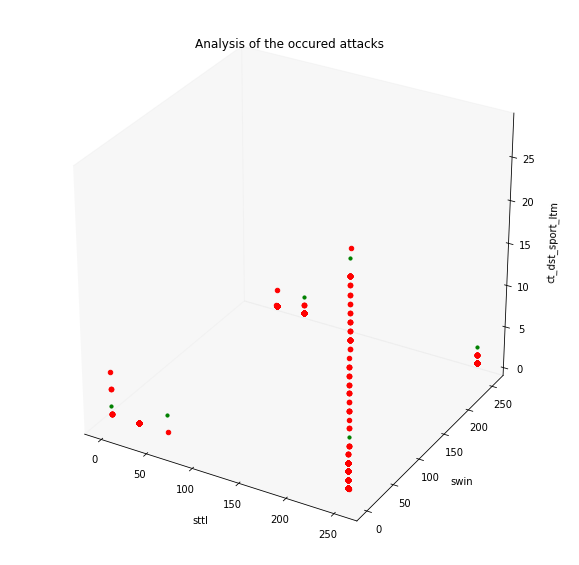

In [18]:
x_axes = np.array(training_data['sttl'][random_indexes])
y_axes = np.array(training_data['swin'][random_indexes])
z_axes = np.array(training_data['ct_dst_sport_ltm'][random_indexes])

visualisation_3d = plt.figure(figsize=(10,10))
axes_3d = visualisation_3d.gca(projection='3d')

axes_3d.xaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))
axes_3d.yaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))
axes_3d.zaxis.set_pane_color((0.9, 0.9, 0.9, 0.3))

axes_3d.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
axes_3d.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
axes_3d.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)

axes_3d.set_xlabel('sttl', labelpad = 10)
axes_3d.set_ylabel('swin', labelpad = 10)
axes_3d.set_zlabel('ct_dst_sport_ltm', labelpad = 10)

axes_3d.set_title('Analysis of the occured attacks')
for i in range(sample_size):
    if(training_data_labels[i] == 0):
        axes_3d.scatter(x_axes[i], y_axes[i], z_axes[i], c='g', s = 10)
    else:
        axes_3d.scatter(x_axes[i], y_axes[i], z_axes[i], c='r', s = 20)

### 2D plots of the selected variables

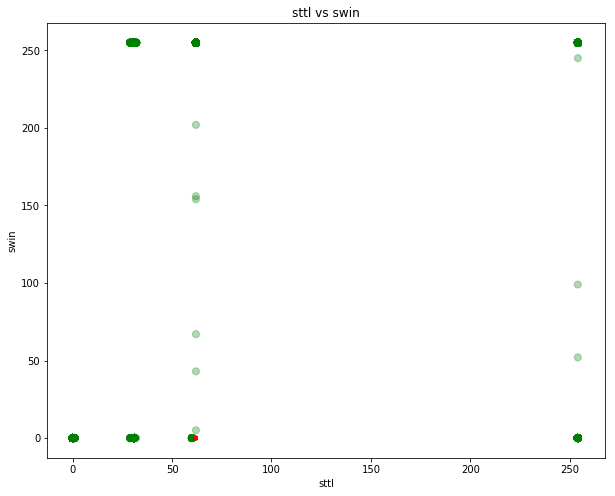

In [19]:
plt.figure(figsize=(10,8))

plot_colors = []
plot_sizes = []

for value in training_data_labels:
    if(value == 0):
        plot_colors.append('g')
        plot_sizes.append(50)
    else:
        plot_colors.append('r')
        plot_sizes.append(10)
        
plt.title('sttl vs swin')
plt.xlabel('sttl')
plt.ylabel('swin')
plt.scatter(training_data['sttl'], training_data['swin'], c = plot_colors, alpha = 0.3, s = plot_sizes)

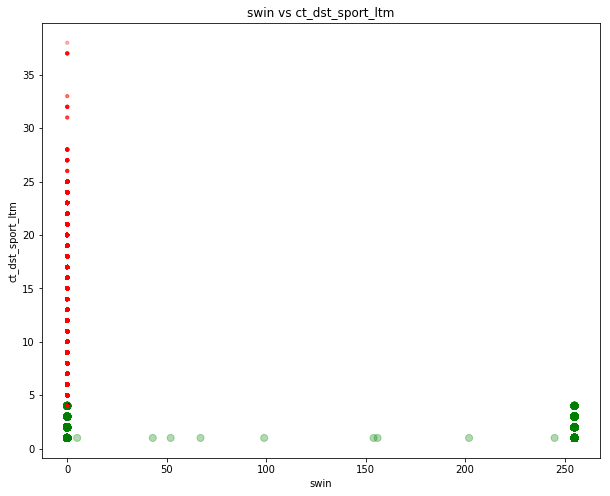

In [20]:
plt.figure(figsize=(10,8))

plt.title('swin vs ct_dst_sport_ltm')
plt.xlabel('swin')
plt.ylabel('ct_dst_sport_ltm')
plt.scatter(training_data['swin'], training_data['ct_dst_sport_ltm'], c = plot_colors, alpha = 0.3, s = plot_sizes)

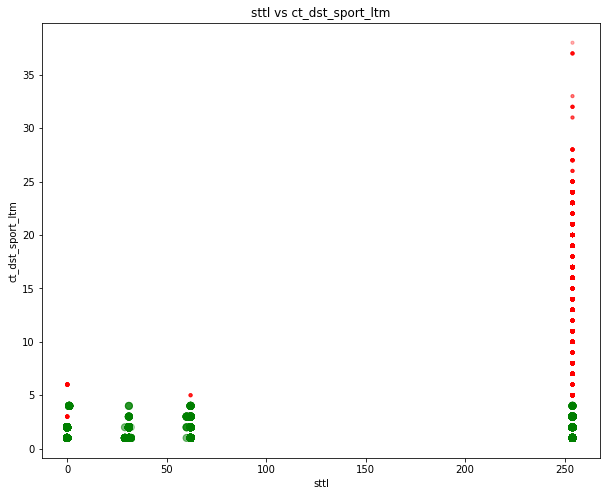

In [21]:
plt.figure(figsize=(10,8))

plt.title('sttl vs ct_dst_sport_ltm')
plt.xlabel('sttl')
plt.ylabel('ct_dst_sport_ltm')
plt.scatter(training_data['sttl'], training_data['ct_dst_sport_ltm'], c = plot_colors, alpha = 0.3, s = plot_sizes)

## Using Extra Trees classifer to determine important features

In [22]:
feature_lists = ['dur', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload',
       'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin',
       'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm',
       'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd',
       'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports']
training_data_features = training_data.loc[:, feature_lists]
training_data_labels = training_data.label

feature_extractor = ExtraTreesClassifier()
feature_extractor.fit(training_data_features, training_data_labels)
feature_values = {}

for value in range(len(feature_extractor.feature_importances_)):
    feature_values[feature_lists[value]] = feature_extractor.feature_importances_[value]
    
sorted_feature_values = sorted(feature_values.items(), key=operator.itemgetter(1))
print(sorted_feature_values)

[('is_ftp_login', 0.0004091045513009035), ('ct_ftp_cmd', 0.0008376182691314189), ('response_body_len', 0.002091919869064487), ('is_sm_ips_ports', 0.00470381850840399), ('spkts', 0.005927001969515197), ('dinpkt', 0.006296556218820551), ('djit', 0.006671524474119055), ('dloss', 0.007133005668566584), ('sloss', 0.007411049968983649), ('sjit', 0.007670462543876174), ('dpkts', 0.007833259192484229), ('ackdat', 0.008237312052184366), ('dwin', 0.008493309767075472), ('dtcpb', 0.00868953221023508), ('sinpkt', 0.00971189543392208), ('dur', 0.010488880612591673), ('ct_flw_http_mthd', 0.0104975152021124), ('dbytes', 0.01201712796394393), ('stcpb', 0.013039614964996915), ('trans_depth', 0.014870119924077866), ('sload', 0.016038149258247814), ('rate', 0.01701458368367066), ('ct_dst_ltm', 0.01708317234175936), ('tcprtt', 0.018609104154789547), ('synack', 0.019584851273639924), ('ct_src_ltm', 0.019853337666178864), ('ct_srv_src', 0.02297232398792374), ('sbytes', 0.029330705381754522), ('dmean', 0.030

## Generating a model with the three variables

### Converting the dataset to a features-label type

The features that have been selected includes the highest correlated variables to the output variable.

In [23]:
feature_lists = ['sttl', 'swin', 'ct_dst_sport_ltm']
training_data_features = training_data.loc[:, feature_lists]
training_data_labels = training_data.label

### Trying out a decision tree classifier

In [24]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(training_data_features, training_data_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the accuracy of the model 

In [25]:
testing_data_features = testing_data.loc[:, feature_lists]
testing_data_labels = testing_data.label

predicted_labels = dt_model.predict(testing_data_features)

In [26]:
print("The accuracy score is: " + str(accuracy_score(predicted_labels, testing_data_labels) * 100))

The accuracy score is: 82.33613359111673


Normalized confusion matrix: 
[[0.91016071 0.08983929]
 [0.21736872 0.78263128]]


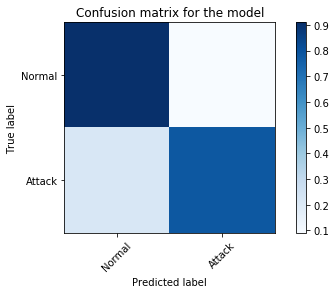

In [27]:
cnf_matrix = confusion_matrix(testing_data_labels, predicted_labels)
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Attack'], title='Confusion matrix for the model')

The accuracy of the model has gone down with just the three most highly-correlated variables. Many reasons could lead to such a behaviour which includes the correlation between the selected variables as well the presence of the outliers which depend on other factors than these.

## Generating a model considering the features from the ET classifier

### Converting the dataset to a features-label type

The features that have been used include those with above **0.20** importance.

In [28]:
feature_lists = ['synack', 'dwin', 'ct_srv_dst', 'ct_src_ltm', 'sbytes', 'ct_srv_src', 'ct_src_dport_ltm', 'rate', 'dload', 'smean', 'ct_dst_sport_ltm', 'dttl', 'swin', 'ct_dst_src_ltm', 'sttl', 'ct_state_ttl']
training_data_features = training_data.loc[:, feature_lists]
training_data_labels = training_data.label

### Trying out a decision tree classifier

In [29]:
dt_model = tree.DecisionTreeClassifier()
dt_model.fit(training_data_features, training_data_labels)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### Check the accuracy of the model 

In [30]:
testing_data_features = testing_data.loc[:, feature_lists]
testing_data_labels = testing_data.label

predicted_labels = dt_model.predict(testing_data_features)

In [31]:
print("The accuracy score is: " + str(accuracy_score(predicted_labels, testing_data_labels) * 100))

The accuracy score is: 89.1006667008857


Normalized confusion matrix: 
[[0.96258929 0.03741071]
 [0.14258302 0.85741698]]


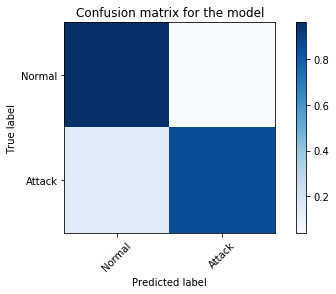

In [32]:
cnf_matrix = confusion_matrix(testing_data_labels, predicted_labels)
plt.figure()

plot_confusion_matrix(cnf_matrix, classes=['Normal', 'Attack'], title='Confusion matrix for the model')

This is partly the type of work that was done as part of my summer internship. I worked on different datasets to analyse different algorithms which could perform the best with the given type of data.